In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report as rep,confusion_matrix as cm
import seaborn as sns

In [0]:
#Importing The Dataset
data = pd.read_csv('data.csv')

In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [0]:
#Dropping empty and obsolete columns
data = data.drop('Unnamed: 32',axis=1)
data = data.drop('id',axis=1)

#Moving Diagnosis to end
cols = list(data.columns.values)
cols.pop(cols.index('diagnosis'))
data = data[cols+['diagnosis']]

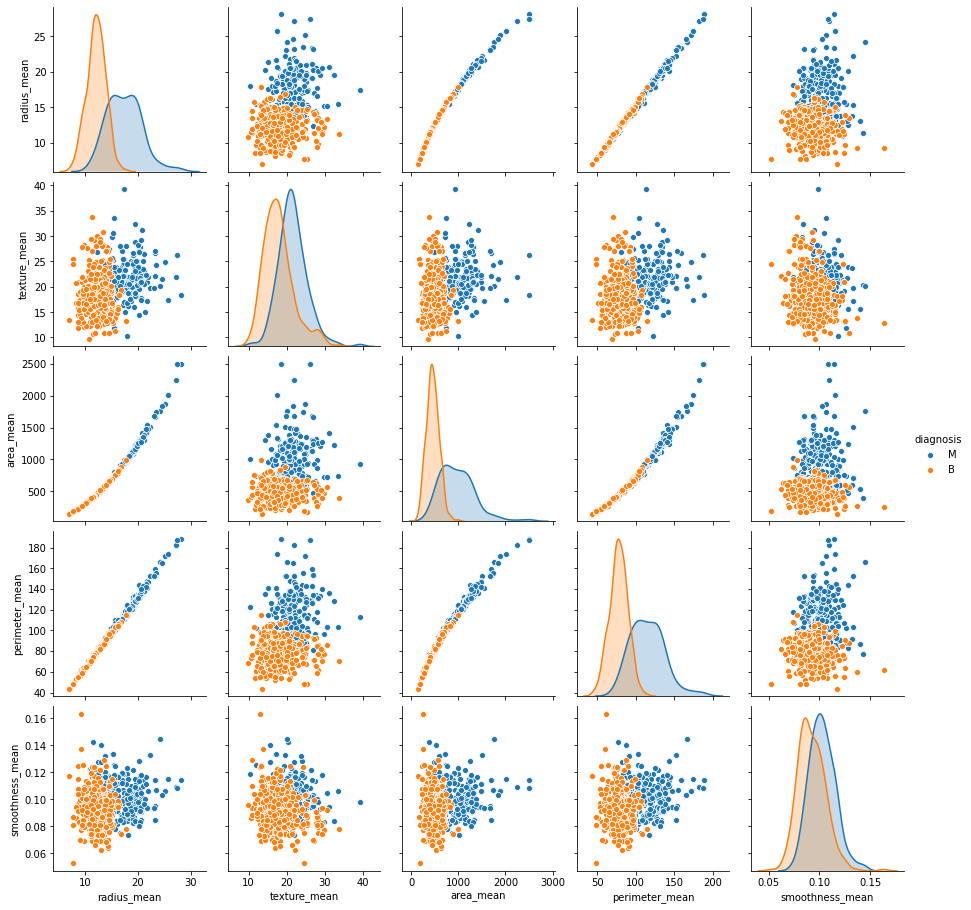

In [10]:
#Plotting Graphs to understand the problems well
import seaborn as sns
sns.pairplot(data,hue='diagnosis',vars=['radius_mean','texture_mean','area_mean','perimeter_mean','smoothness_mean'])

In [0]:
#Converting alphabetical results to  binary
data = data.replace(to_replace=['B','M'],value=[0,1])

In [0]:
#Separating dependent and independent variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [0]:
#Splitting the variables into into test and training sets
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2,random_state = 0)

In [0]:
#Kernel Support Vector Classification

from sklearn.svm import SVC

classifier_svc = SVC(kernel='linear',random_state=0)
classifier_svc.fit(x_train,y_train)
y_svc_pred = classifier_svc.predict(x_test)

In [0]:
#Simple Support Vector Classification

from sklearn.svm import SVC

classifier_svm = SVC()
classifier_svm.fit(x_train,y_train)
y_svm_pred = classifier_svm.predict(x_test)


In [0]:
#Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(x_train, y_train)
y_naive_pred = classifier_naive.predict(x_test)

In [0]:
#KNN Classification

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)
y_knn_pred = classifier_knn.predict(x_test)

In [18]:
#Results of the classifications

con_svc = cm(y_test,y_svc_pred)
con_naive = cm(y_test,y_naive_pred)
con_svm = cm(y_test,y_svm_pred)
con_knn = cm(y_test,y_knn_pred)
print("SVC RESULTS \n",rep(y_test,y_svc_pred),"\n")
print("NAIVE BAYES RESULTS\n",rep(y_test,y_naive_pred),"\n")
print("SIMPLE SVM RESULTS\n",rep(y_test,y_svm_pred),"\n")
print("KNN RESULTS\n",rep(y_test,y_knn_pred),"\n")

SVC RESULTS 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114
 

NAIVE BAYES RESULTS
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114
 

SIMPLE SVM RESULTS
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg   

In [19]:
con_svc

array([[63,  4],
       [ 1, 46]])

In [20]:
pd.DataFrame(x_test).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,16.41,29.66,113.30,844.4,0.1574,0.3856,0.5106,0.20510,0.3585,0.11090
1,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.58,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788
2,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0.2142,0.6549,1.606,19.25,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,14.91,19.31,96.53,688.9,0.1034,0.1017,0.0626,0.08216,0.2136,0.06710


In [21]:
pd.DataFrame(y_test).head(3)  

,0
0,1
1,0
2,0


In [22]:
pd.DataFrame(y_knn_pred).head(3)

,0
0,1
1,0
2,0


In [23]:
pd.DataFrame(y_svc_pred).head(3)

,0
0,1
1,0
2,0


In [24]:
pd.DataFrame(y_svm_pred).head(3)

,0
0,0
1,0
2,0
